In [1]:
import re
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/mnt/storage/home/qc19291/anaconda3/envs/BlindCamera/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_error = []
epoch_error = []
val_error = []
file = open('verb_fixed_len.out', 'r') 
Lines = file.readlines() 
epoch_num = 0
for line in Lines:
    if 'Epoch:' in line:
        new_num = int(re.search('Epoch: \[(\d+)]', line).group(1))
        if not(epoch_num == new_num):
            epoch_error = list(map(float, epoch_error))
            train_error.append((sum(epoch_error)/len(epoch_error)))
            epoch_error = []
            
        result = re.search('Error@1 (\d+\.\d+) \((\d+\.\d+)\)', line)
        error = result.group(1)
        epoch_error.append(error)
        epoch_num = new_num
            
        
    elif ' * ' in line:
        result = re.search('Error@1 (\d+\.\d+)', line)
        error = result.group(1)
        val_error.append(error)
train_error = list(map(float, train_error))
val_error = list(map(float, val_error))

train:12.440943396226416
val:65.781


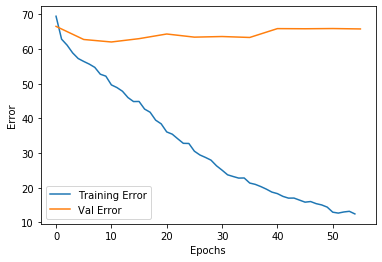

In [3]:
import numpy as np
train_error = train_error[:len(train_error) - (len(train_error) % 5)]
val_xaxis = list(range(0, len(train_error)+1, 5))

print("train:" + str(train_error[-1]))
print("val:" + str(val_error[-1]))

plt.plot(train_error, label='Training Error')
plt.plot(val_xaxis, val_error, label='Val Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
len(val_error)

In [ ]:
len(train_error)

In [ ]:
len(train_error) % 5

In [ ]:
train_error = train_error[:(len(train_error) - (len(train_error) % 5))]
print(len(train_error))
val_xaxis = list(range(0, len(train_error)+1, 5))
print(len(val_xaxis))

In [ ]:
val_xaxis